In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv(
    "data/reliance_ml_dataset.csv",
    index_col=0,
    parse_dates=True
)

selected_features = [
    # use your pruned features here
    # example:
    "return",
    "rsi",
    "volatility",
    "nifty_return",
    "banknifty_return",
    "sma_20",
    "sma_50"
]

X = dataset[selected_features]
y = dataset["target"]


In [3]:
X.shape, y.shape


((1688, 7), (1688,))

In [4]:
train_size = 500     # ~2 years
test_size  = 60      # ~3 months

start = 0
end = train_size


In [5]:
results = []

while end + test_size <= len(X):

    X_train = X.iloc[start:end]
    y_train = y.iloc[start:end]

    X_test = X.iloc[end:end + test_size]
    y_test = y.iloc[end:end + test_size]

    model = RandomForestClassifier(
        n_estimators=600,
        max_depth=14,
        min_samples_leaf=10,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred)

    results.append({
        "train_start": X_train.index[0],
        "train_end": X_train.index[-1],
        "test_start": X_test.index[0],
        "test_end": X_test.index[-1],
        "accuracy": acc
    })

    # slide window
    start += test_size
    end += test_size


In [6]:
wf_results = pd.DataFrame(results)
wf_results


,train_start,train_end,test_start,test_end,accuracy
0,2019-03-12,2021-03-17,2021-03-18,2021-06-16,0.533333
1,2019-06-12,2021-06-16,2021-06-17,2021-09-13,0.500000
2,2019-09-09,2021-09-13,2021-09-14,2021-12-09,0.383333
3,2019-12-09,2021-12-09,2021-12-10,2022-03-07,0.483333
4,2020-03-03,2022-03-07,2022-03-08,2022-06-03,0.466667
5,2020-06-04,2022-06-03,2022-06-06,2022-08-30,0.516667
6,2020-08-27,2022-08-30,2022-09-01,2022-11-28,0.483333
7,2020-11-20,2022-11-28,2022-11-29,2023-02-21,0.483333
8,2021-02-17,2023-02-21,2023-02-22,2023-05-24,0.600000
9,2021-05-20,2023-05-24,2023-05-25,2023-08-18,0.500000


In [7]:
wf_results["accuracy"].describe()

count    19.000000
mean      0.512281
std       0.053530
min       0.383333
25%       0.483333
50%       0.500000
75%       0.558333
max       0.600000
Name: accuracy, dtype: float64

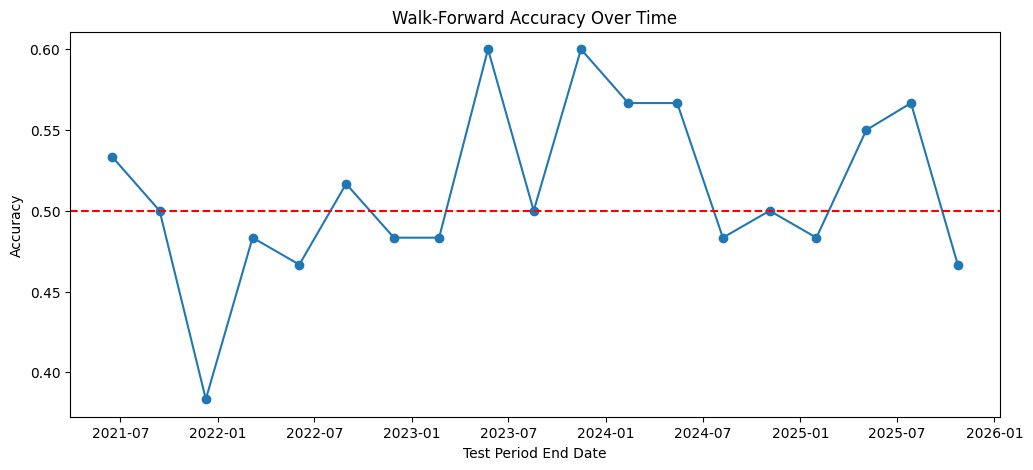

In [8]:
plt.figure(figsize=(12,5))
plt.plot(wf_results["test_end"], wf_results["accuracy"], marker="o")
plt.axhline(0.5, color="red", linestyle="--")
plt.title("Walk-Forward Accuracy Over Time")
plt.ylabel("Accuracy")
plt.xlabel("Test Period End Date")
plt.show()


In [9]:
wf_results.to_csv("results/reliance_walk_forward_results.csv", index=False)
